# loading the dataset (Nvidia stock)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the dataset
file_path = 'archive/NVIDIA_STOCK.csv'
data = pd.read_csv(file_path)

# Fill missing values
data = data.fillna(0)

# Ensure all columns are numeric, converting non-numeric values to NaN and then filling them with 0
data['Volume'] = pd.to_numeric(data['Volume'], errors='coerce').fillna(0)
data['Open'] = pd.to_numeric(data['Open'], errors='coerce').fillna(0)
data['High'] = pd.to_numeric(data['High'], errors='coerce').fillna(0)
data['Low'] = pd.to_numeric(data['Low'], errors='coerce').fillna(0)
data['Close'] = pd.to_numeric(data['Close'], errors='coerce').fillna(0)
data['Adj Close'] = pd.to_numeric(data['Adj Close'], errors='coerce').fillna(0)

# Create a binary target column: 1 if Close > Open, else 0
data['Price Movement'] = (data['Close'] > data['Open']).astype(int)

# Define features and target
X = data[['High', 'Low', 'Open', 'Volume']]
y = data['Price Movement']

# without class balancing

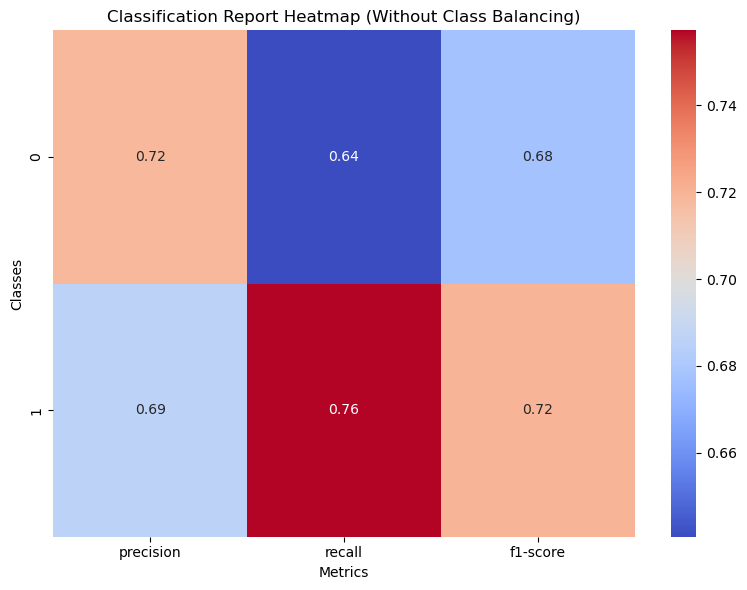

In [4]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

# Visualization
report_df = pd.DataFrame(report).transpose()
class_metrics = report_df.iloc[:-3, :]

plt.figure(figsize=(8, 6))
sns.heatmap(class_metrics[['precision', 'recall', 'f1-score']], annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Classification Report Heatmap (Without Class Balancing)")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.tight_layout()
plt.show()


# with class balancing

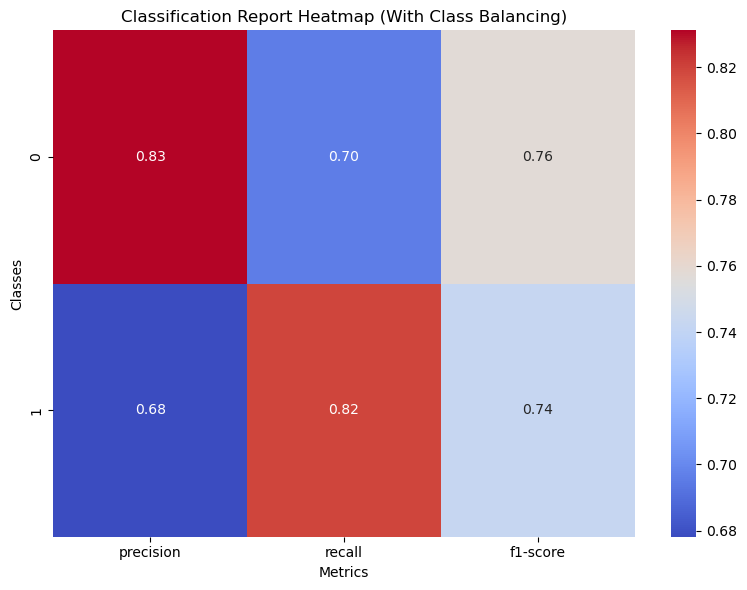

In [6]:
# Balance classes by oversampling the minority class
data_majority = data[data['Price Movement'] == 0]
data_minority = data[data['Price Movement'] == 1]

data_minority_upsampled = resample(data_minority, 
                                   replace=True, 
                                   n_samples=len(data_majority), 
                                   random_state=42)

data_balanced = pd.concat([data_majority, data_minority_upsampled])

# Define features and target for balanced data
X_balanced = data_balanced[['High', 'Low', 'Open', 'Volume']]
y_balanced = data_balanced['Price Movement']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Train the model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

# Visualization
report_df = pd.DataFrame(report).transpose()
class_metrics = report_df.iloc[:-3, :]

plt.figure(figsize=(8, 6))
sns.heatmap(class_metrics[['precision', 'recall', 'f1-score']], annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Classification Report Heatmap (With Class Balancing)")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.tight_layout()
plt.show()


# features scalling

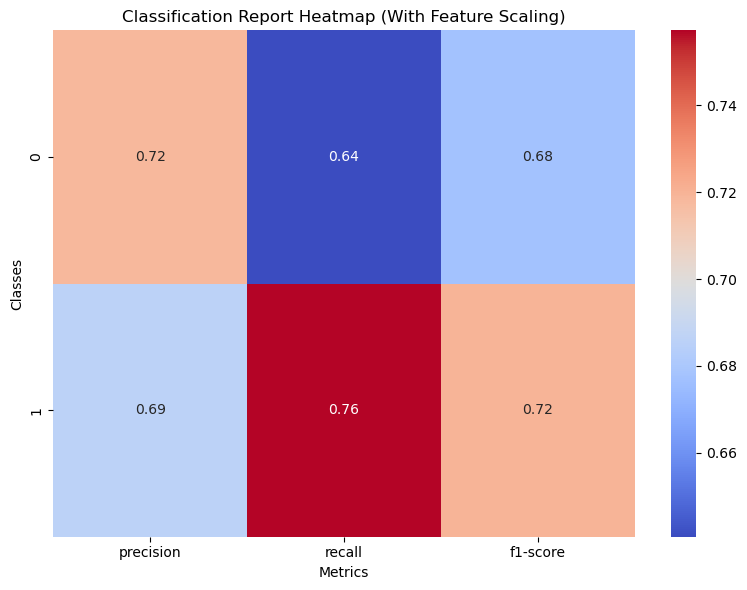

In [8]:
# Feature scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

# Visualization
report_df = pd.DataFrame(report).transpose()
class_metrics = report_df.iloc[:-3, :]

plt.figure(figsize=(8, 6))
sns.heatmap(class_metrics[['precision', 'recall', 'f1-score']], annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Classification Report Heatmap (With Feature Scaling)")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.tight_layout()
plt.show()


# normalization

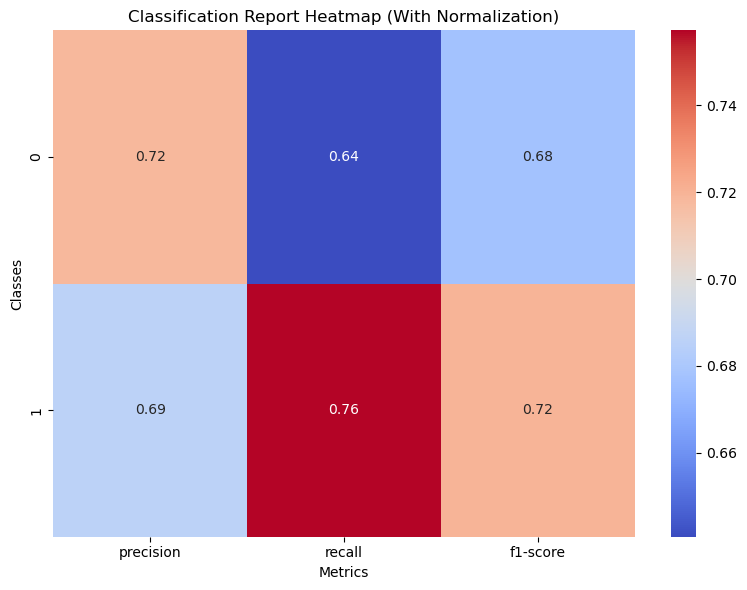

In [10]:
# Feature normalization using MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Train the model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)

# Visualization
report_df = pd.DataFrame(report).transpose()
class_metrics = report_df.iloc[:-3, :]

plt.figure(figsize=(8, 6))
sns.heatmap(class_metrics[['precision', 'recall', 'f1-score']], annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Classification Report Heatmap (With Normalization)")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.tight_layout()
plt.show()

# Classification: Random Forest Classifier

              precision    recall  f1-score   support

           0       0.61      0.65      0.63       154
           1       0.69      0.65      0.67       186

    accuracy                           0.65       340
   macro avg       0.65      0.65      0.65       340
weighted avg       0.65      0.65      0.65       340



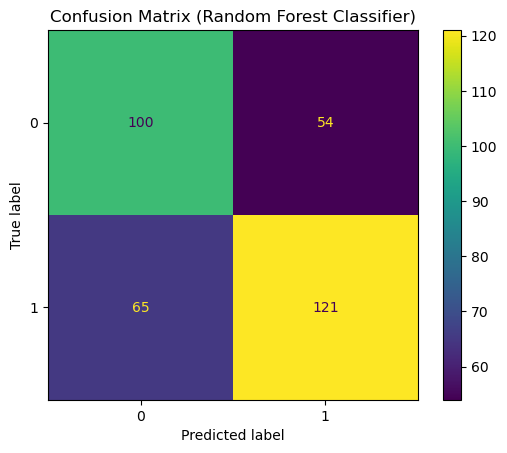

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('archive/NVIDIA_STOCK.csv')

# Ensure numeric data only
data['Volume'] = pd.to_numeric(data['Volume'], errors='coerce')
data.dropna(inplace=True)

# Create a binary target: Price movement
data['Price Movement'] = (data['Close'] > data['Open']).astype(int)

# Features and target
X = data[['High', 'Low', 'Open', 'Volume']]
y = data['Price Movement']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Visualization: Confusion Matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.title("Confusion Matrix (Random Forest Classifier)")
plt.show()


# Regression Model: Random Forest Regressor

MAE: 0.2762476464089226
MSE: 0.31257094792412005


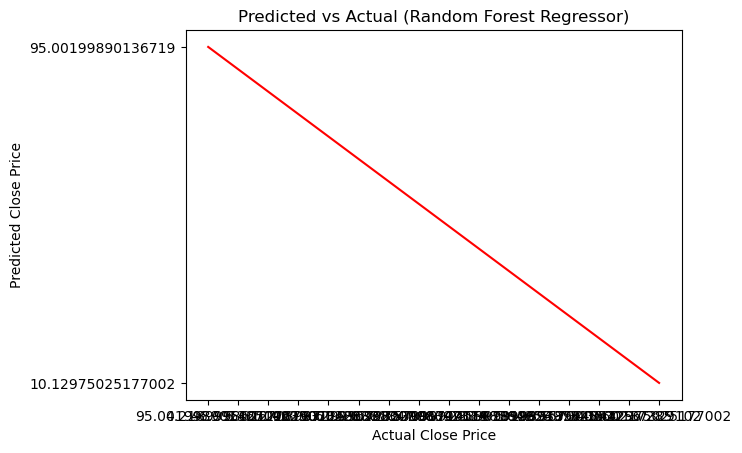

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Features and target
X = data[['High', 'Low', 'Open', 'Volume']]
y = data['Close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)

# Predictions and evaluation
y_pred = reg.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

# Visualization: Predicted vs Actual
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.title("Predicted vs Actual (Random Forest Regressor)")
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.show()


In [24]:
from sklearn.metrics import r2_score

# Calculate R² score (accuracy for regression models)
r2 = r2_score(y_test, y_pred)
print(f"R² Score (Accuracy): {r2 * 100:.2f}%")


R² Score (Accuracy): 99.96%


# TRegression Model: K-Nearest Neighbors Regressor

MAE: 22.172231409970454
MSE: 1104.6685631629946


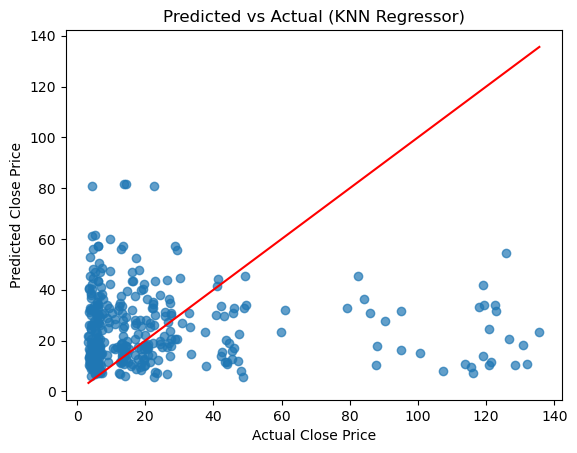

In [26]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Ensure all features are numeric
X = data[['High', 'Low', 'Open', 'Volume']].apply(pd.to_numeric, errors='coerce')
y = data['Close'].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values caused by non-numeric conversions
X = X.dropna()
y = y.loc[X.index]  # Ensure y aligns with the cleaned X

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

# Predictions and evaluation
y_pred = knn_regressor.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

# Visualization: Predicted vs Actual
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.title("Predicted vs Actual (KNN Regressor)")
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.show()


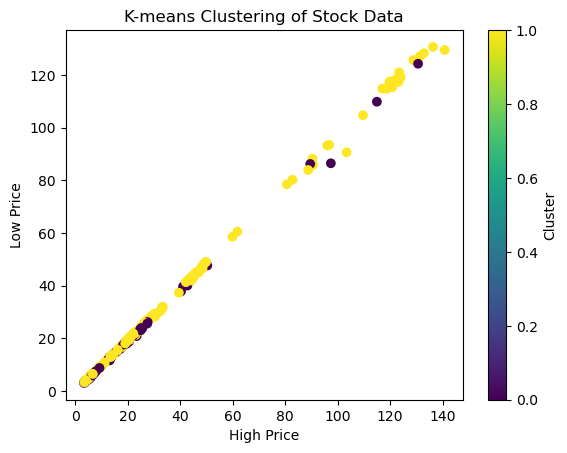

Silhouette Score: 0.59


In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Features for clustering
X = data[['High', 'Low', 'Open', 'Volume']].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
X = X.dropna()

# Train-test split (though K-means is unsupervised, we will keep it for consistency)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # Assuming 2 clusters (can be adjusted)
kmeans.fit(X_train)

# Predict clusters for the test data
y_pred = kmeans.predict(X_test)

# Visualization of the clusters
plt.scatter(X_test['High'], X_test['Low'], c=y_pred, cmap='viridis')
plt.title("K-means Clustering of Stock Data")
plt.xlabel("High Price")
plt.ylabel("Low Price")
plt.colorbar(label='Cluster')
plt.show()

# Calculate silhouette score to measure how well the clustering performed
sil_score = silhouette_score(X_test, y_pred)
print(f"Silhouette Score: {sil_score:.2f}")
